In [174]:
import csv

with open('data/20230312_191444.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [175]:
from datetime import datetime
from dateutil.parser import parse


def from_row(row):
    date, raw, c, f = row
    date = parse(date)
    raw, c, f = float(raw), float(c), float(f)
    return date, raw, c, f


x = []
y = []
for row in data:
    date, _, _, f = from_row(row)
    x.append(date)
    y.append(f)

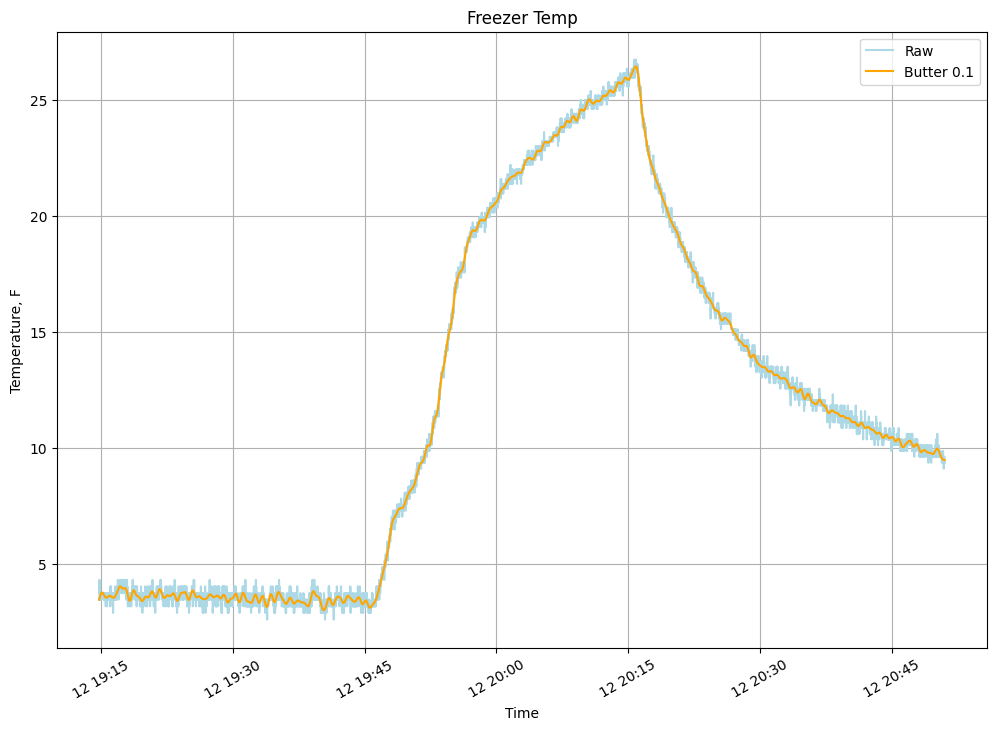

Average temperature 12.0 F


In [171]:
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter

plt.plot(x, y, label='Raw', color='lightblue')

b, a = butter(1, 0.2)
clean = filtfilt(b, a, y)
# plt.plot(x, clean, label='Butter 0.2')

b, a = butter(10, 0.05)
clean = filtfilt(b, a, y)
plt.plot(x, clean, label='Butter 0.1', color='orange')

plt.title('Freezer Temp')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.ylabel('Temperature, F')
plt.grid()
plt.legend()
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

avg = sum(y) / len(y)
print('Average temperature {:.03} F'.format(avg))